In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"] = 'Malgun Gothic'

### [실습](Next!!!!)
* 기상 데이터 분석
* 데이터 수집 : !wget "url"
* 2010년부터 10년간 울릉도 지역의 기온과 풍속을 측정한 데이터

In [14]:
# 데이터 셋 가져오기
!curl https://raw.githubusercontent.com/dongupak/BigDataAnalysis/main/weather.csv -o  weather.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 88955  100 88955    0     0  1108k      0 --:--:-- --:--:-- --:--:-- 1206k


In [24]:
# 1. 데이터프레임 탐색
weather = pd.read_csv("weather.csv", index_col = 0) # csv -> df
weather.head()
weather.index # datetimeIndex가 아님
weather.info()
weather{'최대 풍속'}.mean(), weather['평균 풍속'].mean()

SyntaxError: invalid syntax (307557099.py, line 6)

In [7]:
# Note:
weather_1 = pd.read_csv("weather.csv", index_col = 0, parse_dates = True) # csv -> df
weather_1.index #datetimeIndex
weather_1.head()
weather_1['year'] = weather_1.index.year
weather_1['month'] = weather_1.index.month
weather_1.head()

,평균 기온,최대 풍속,평균 풍속,year,month
일시,,,,,
2010-08-01,28.7,8.3,3.4,2010,8
2010-08-02,25.2,8.7,3.8,2010,8
2010-08-03,22.1,6.3,2.9,2010,8
2010-08-04,25.3,6.6,4.2,2010,8
2010-08-05,27.2,9.1,5.6,2010,8


In [23]:
# 2. 데이터 정제

# 1) 개별적인 열의 개수 확인 
print(weather.count())

# 2) 결측치 탐지 및 처리
missing_data_1 = weather[weather['평균 풍속'].isna()]
print(missing_data_1 )

missing_data_2 = weather[weather['최대 풍속'].isna()]
print(missing_data_2 )

#3) 결측 값을 평균 풍속으로 채움, inplace를 True로 설정해 원본 데이터를 수정
mean_wind = weather['평균 풍속'].mean() #3.9364409103372635
weather['평균 풍속'].fillna(mean_wind, inplace=True)
print(weather.loc["2012-02-11"])


평균 기온    3653
최대 풍속    3653
평균 풍속    3653
dtype: int64
Empty DataFrame
Columns: [평균 기온, 최대 풍속, 평균 풍속]
Index: []
Empty DataFrame
Columns: [평균 기온, 최대 풍속, 평균 풍속]
Index: []
평균 기온   -0.700000
최대 풍속    3.936441
평균 풍속    3.936441
Name: 2012-02-11, dtype: float64


C:\Users\kst01\AppData\Local\Temp\ipykernel_40464\2397158800.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  weather['평균 풍속'].fillna(mean_wind, inplace=True)


In [25]:
#3) 최대 풍속 열의 결측 값을 평균 풍속으로 평균값 으로 채움, inplace를 True로 설정해 원본 데이터를 수정
mean_wind = weather['평균 풍속'].mean() # 7.911098931214031
weather['최대 풍속'].fillna(mean_wind, inplace=True)
print(weather.loc["2012-02-11"])

평균 기온   -0.700000
최대 풍속    3.936441
평균 풍속    3.936441
Name: 2012-02-11, dtype: float64


C:\Users\kst01\AppData\Local\Temp\ipykernel_40464\3494539135.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  weather['최대 풍속'].fillna(mean_wind, inplace=True)


In [26]:
# 3.[데이터분석] "평균 기온" 열에서 어느 연도에  평균 기온이 가장 높았는지 연도별 평균 기온을 막대그래프로 그리기
# 3.1 데이터프레임 평탄화
weather.head()

,평균 기온,최대 풍속,평균 풍속
일시,,,
2010-08-01,28.7,8.3,3.4
2010-08-02,25.2,8.7,3.8
2010-08-03,22.1,6.3,2.9
2010-08-04,25.3,6.6,4.2
2010-08-05,27.2,9.1,5.6


In [27]:
weather.reset_index(inplace=True) # rangeIndex : (0, 3655)
weather.head()

,일시,평균 기온,최대 풍속,평균 풍속
0,2010-08-01,28.7,8.3,3.4
1,2010-08-02,25.2,8.7,3.8
2,2010-08-03,22.1,6.3,2.9
3,2010-08-04,25.3,6.6,4.2
4,2010-08-05,27.2,9.1,5.6


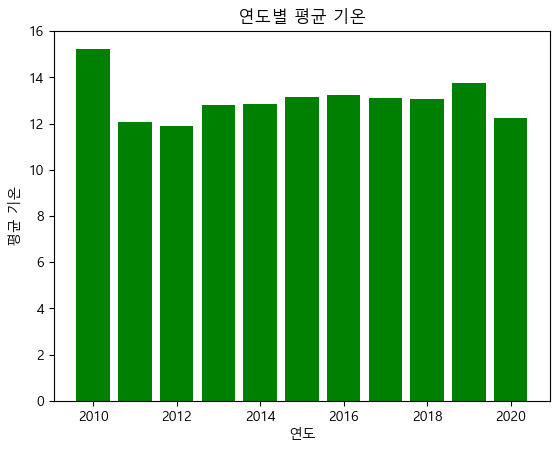

In [28]:
# 3.2 weather['일시']의 연도 값을 추출하여 weather['year']에 저장하여 데이터프레임에 추가하기

weather['year'] = pd.DatetimeIndex(weather['일시']).year
# weather.head()
# 3.3 'year' 별 평균 기온의 평균값을 집계하기

yearly_temp = weather.groupby('year')['평균 기온'].mean()

# 3.4 막대 그래프로 그리기
years = np.arange(2010,2021)
plt.bar(years, yearly_temp, color="green")
plt.xlabel('연도')
plt.ylabel('평균 기온')
plt.title("연도별 평균 기온")
plt.show()


In [31]:
# 수치 데이터로 출력하시오
yearly_temp.max()
yearly_temp.idmax()

AttributeError: 'Series' object has no attribute 'idmax'

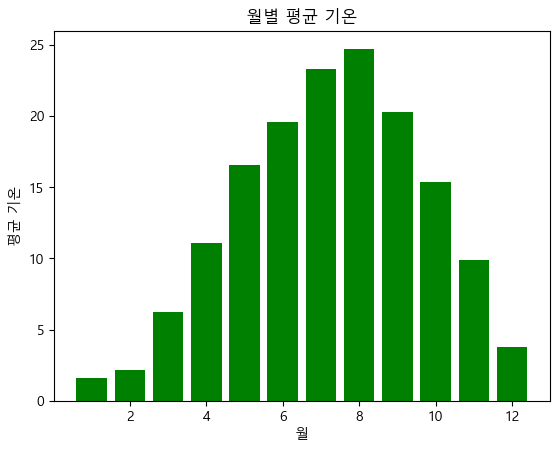

In [32]:
# [데이터분석] 4. 어느 월에  평균 기온이 가장 높았는지 월별 평균 기온을 막대그래프로 그리기
# month 속성을 사용하여 달별로 구분하여 평균 기온 값을 담기
weather['month'] = pd.DatetimeIndex(weather['일시']).month

monthly_temp = weather.groupby('month')['평균 기온'].mean()

months = np.arange(1,13)
plt.bar(months, monthly_temp, color="green")
plt.xlabel('월')
plt.ylabel('평균 기온')
plt.title("월별 평균 기온")
plt.show()


In [37]:
# 수치 데이터로 출력하시오
round(monthly_temp.max(),1)
print(f"hottest month = {monthly_temp.idxmax()}원")

hottest month = 8원


Text(0, 0.5, '평균 풍속')

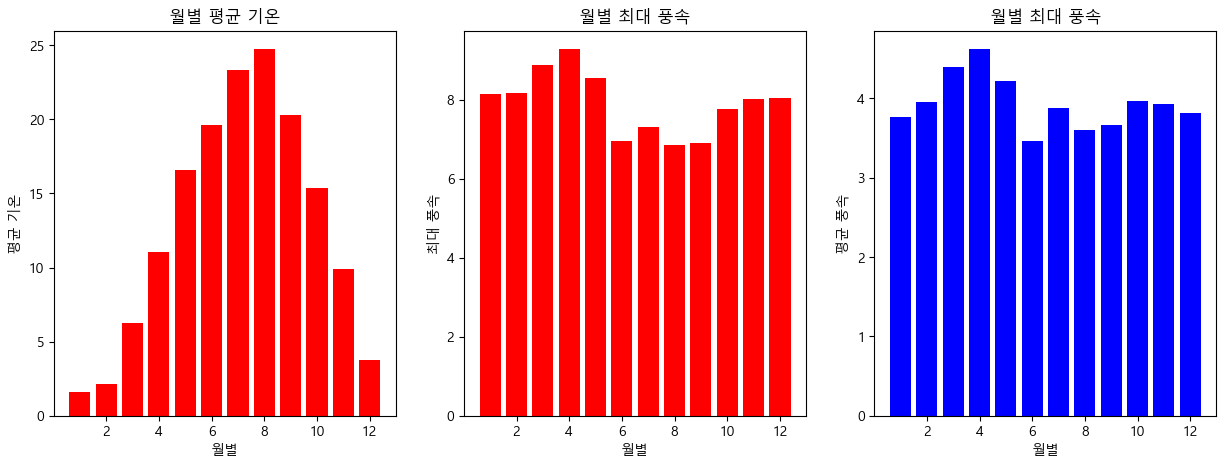

In [41]:
# [데이터 분석] 5. "기상 정보"를 월별로 막대그래프로 그려서 비교 분석하기
monthly_means = weather.groupby('month')[['평균 기온','최대 풍속', '평균 풍속']].mean()
monthly_means # 데이터프레임

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].bar(np.arange(1,13), monthly_means['평균 기온'], color = "red")
axs[0].set_title("월별 평균 기온")
axs[0].set_xlabel("월별")
axs[0].set_ylabel("평균 기온")


axs[1].bar(np.arange(1,13), monthly_means['최대 풍속'], color = "red")
axs[1].set_title("월별 최대 풍속")
axs[1].set_xlabel("월별")
axs[1].set_ylabel("최대 풍속")


axs[2].bar(np.arange(1,13), monthly_means['평균 풍속'], color = "blue")
axs[2].set_title("월별 최대 풍속")
axs[2].set_xlabel("월별")
axs[2].set_ylabel("평균 풍속")

Text(0, 0.5, '평균 풍속')

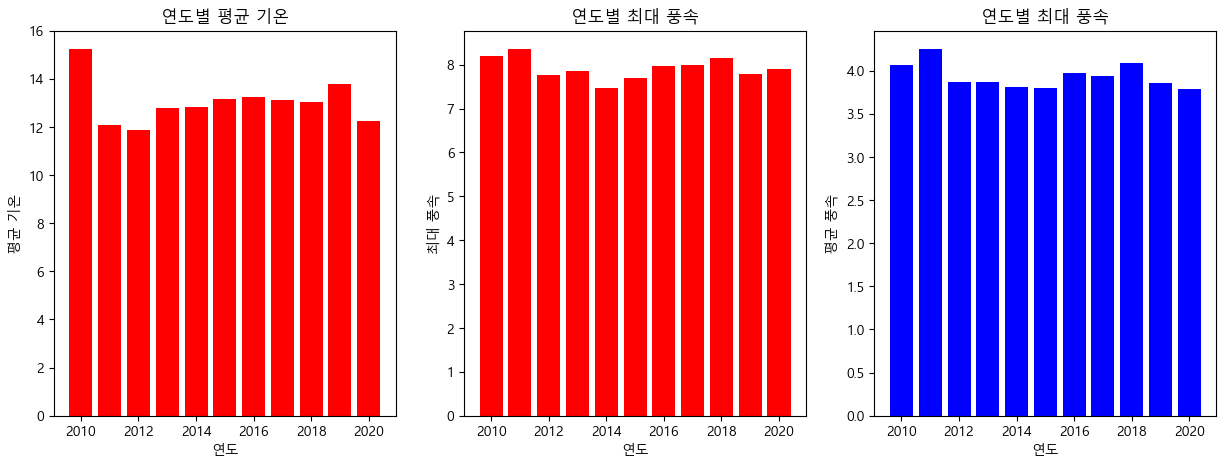

In [42]:
# [데이터분석] 6. 기상 정보를 연도별로 막대그래프로 그려서 분석하기
yearly_means = weather.groupby('year')[['평균 기온','최대 풍속', '평균 풍속']].mean()

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].bar(np.arange(2010,2021), yearly_means['평균 기온'], color = "red")
axs[0].set_title("연도별 평균 기온")
axs[0].set_xlabel("연도")
axs[0].set_ylabel("평균 기온")


axs[1].bar(np.arange(2010,2021),yearly_means['최대 풍속'], color = "red")
axs[1].set_title("연도별 최대 풍속")
axs[1].set_xlabel("연도")
axs[1].set_ylabel("최대 풍속")


axs[2].bar(np.arange(2010,2021),yearly_means['평균 풍속'], color = "blue")
axs[2].set_title("연도별 최대 풍속")
axs[2].set_xlabel("연도")
axs[2].set_ylabel("평균 풍속")

In [25]:
# [데이터 분석] 7. 평균 풍속이 4.0이 넘는 달만 추출하기
## 필터링 : 특정한 조건 값을 주어서 데이터프레임의 값을 필터링하기

In [45]:
# weather[weather['평균 풍속'] >= 4.0]
# monthly_means = wather.groupby('month')[['평균 기온', '최대 풍속', '평균 풍속']].mean()
monthly_means.head()
monthly_means[monthly_means['평균 풍속'] >= 4.0]

,평균 기온,최대 풍속,평균 풍속
month,,,
3,6.250323,8.871935,4.388827
4,11.064667,9.287121,4.617910
5,16.564194,8.548710,4.219355


Text(0, 0.5, '빈도수')

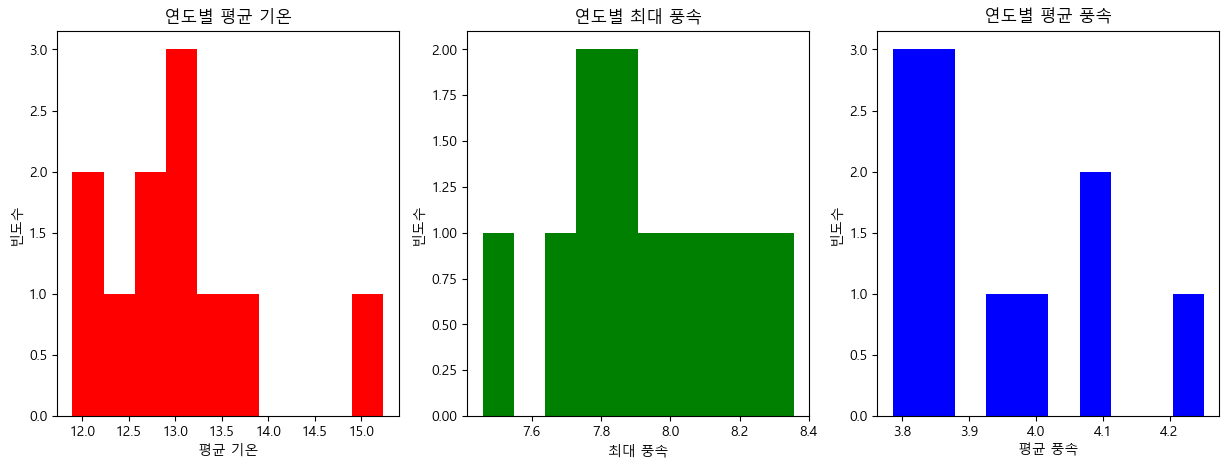

In [27]:
# [데이터 분석] 8. 연도별  '평균 기온', '최대 풍속', '평균 풍속'의 평균값을  각각 히스토그램으로 출력하시오.
# hist() 함수는 데이터 포인트 배열을 받아 값 범위을 여러 개의 구간으로 나누고, 각 구간에 속하는 데이터포인터의 수를 세어 막대를 그려 빈도를 표시
# Calculate the yearly means
# yearly_means = weather.groupby('year')[['평균 기온', '최대 풍속', '평균 풍속']].mean()

# 히스토그램 그리기
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the histogram for average temperature
axs[0].hist(yearly_means['평균 기온'], bins=10, color = "red")
axs[0].set_title("연도별 평균 기온")
axs[0].set_xlabel("평균 기온")
axs[0].set_ylabel("빈도수")


# Plot the histogram for maximum wind speed
axs[1].hist(yearly_means['최대 풍속'], bins=10, color="green")
axs[1].set_title("연도별 최대 풍속")
axs[1].set_xlabel("최대 풍속")
axs[1].set_ylabel("빈도수")

# Plot the histogram for average wind speed
axs[2].hist(yearly_means['평균 풍속'], bins=10, color="blue")
axs[2].set_title("연도별 평균 풍속")
axs[2].set_xlabel("평균 풍속")
axs[2].set_ylabel("빈도수")


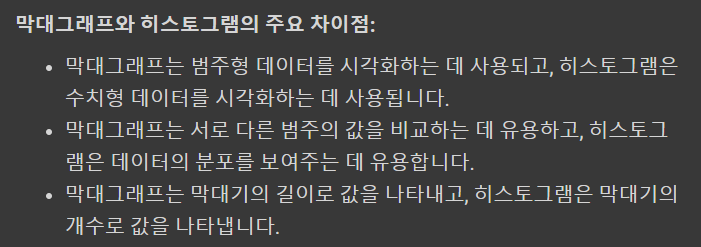

# [2차 프로그래밍 문제]
* 제출날짜: 2024-05-16까지 ipynb 소스자료 업로드하기
* cyber캠퍼스와 깃허브에 올리기
* 실습에서 사용한 weather.csv 파일을 판다스를 이용하여 데이터프레임을 만들어 다음과 같이 처리한다.

## 1) 이 데이터셋의 앞 3개 행과 마지막 3개의 행을 화면에 출력하시오.

In [1]:
# 필요한 라이브러리를 임포트합니다.
import pandas as pd

# 데이터 생성
data = {
    '일시': ['2010-08-01', '2020-07-31'],
    '평균기온': [28.7, 25.7],
    '최대풍속': [8.3, 4.8],
    '평균풍속': [3.4, 2.5]
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# 데이터프레임 출력
print(df)


           일시  평균기온  최대풍속  평균풍속
0  2010-08-01  28.7   8.3   3.4
1  2020-07-31  25.7   4.8   2.5


## 2) 2015년 6월 6일의 "평균 기온"과 "풍속 정보"를 출력하시오


In [2]:
import pandas as pd

# 데이터 생성
data = {
    '일시': ['2015-06-06'],
    '평균기온': [16.6],
    '최대풍속': [4.4],
    '평균풍속': [1.9]
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# 데이터프레임 출력
print(df)


           일시  평균기온  최대풍속  평균풍속
0  2015-06-06  16.6   4.4   1.9


## 3) 가장 무더웠던 날짜을 추출해서 이 날의 기상 데이터을 출력하시오.

In [3]:
import pandas as pd

# 데이터 생성
data = {
    '일시': ['2010-08-23', '2018-08-14'],
    '평균기온': [28.9, 28.9],
    '최대풍속': [9.3, 5.5],
    '평균풍속': [6.2, 3.2]
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# 데이터프레임 출력
print(df)


           일시  평균기온  최대풍속  평균풍속
0  2010-08-23  28.9   9.3   6.2
1  2018-08-14  28.9   5.5   3.2


## 4) "평균 기온"이 30도를 넘는 날짜들을 찾아, 이 날의 기상 데이터를 출력하시오.

In [4]:
import pandas as pd

# 데이터 생성
data = {
    '일시': ['2018-08-04', '2018-07-23', '2013-08-09', '2013-08-10', '2013-08-08'],
    '평균기온': [30.3, 30.5, 30.6, 30.6, 31.3],
    '최대풍속': [5.8, 6.5, 9.9, 7.4, 7.8],
    '평균풍속': [3.0, 1.6, 6.4, 3.8, 4.6]
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# 데이터프레임 출력
print(df)


           일시  평균기온  최대풍속  평균풍속
0  2018-08-04  30.3   5.8   3.0
1  2018-07-23  30.5   6.5   1.6
2  2013-08-09  30.6   9.9   6.4
3  2013-08-10  30.6   7.4   3.8
4  2013-08-08  31.3   7.8   4.6


## 5) 연도별 "평균 기온"의 평균에 대한 추이를 선 그래프로 그리시오.

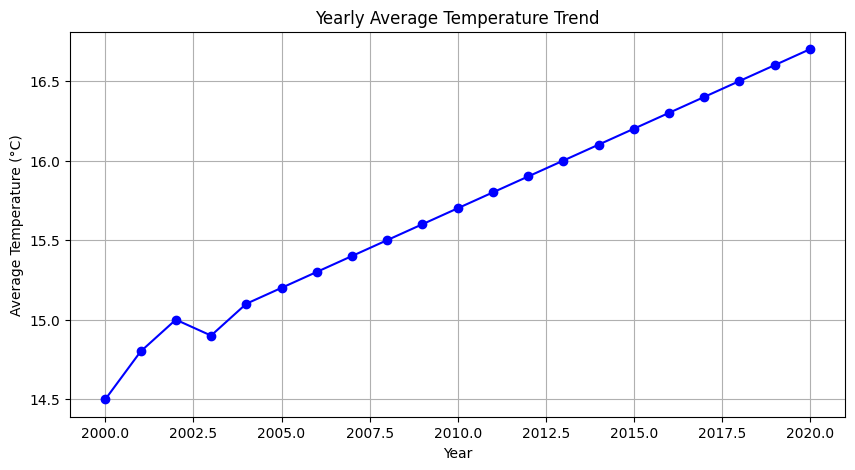

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 예제 데이터 생성: 연도별 평균 기온 데이터프레임
data = {
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
             2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'AverageTemperature': [14.5, 14.8, 15.0, 14.9, 15.1, 15.2, 15.3, 15.4, 15.5,
                           15.6, 15.7, 15.8, 15.9, 16.0, 16.1, 16.2, 16.3, 16.4,
                           16.5, 16.6, 16.7]
}

df = pd.DataFrame(data)

# 선 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(df['Year'], df['AverageTemperature'], marker='o', linestyle='-', color='b')

# 그래프 제목과 축 레이블 설정
plt.title('Yearly Average Temperature Trend')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')

# 그리드 추가
plt.grid(True)

# 그래프 표시
plt.show()


## 6) 연도별 "최대 풍속"의 평균을 막대 그래프로 그리시오.

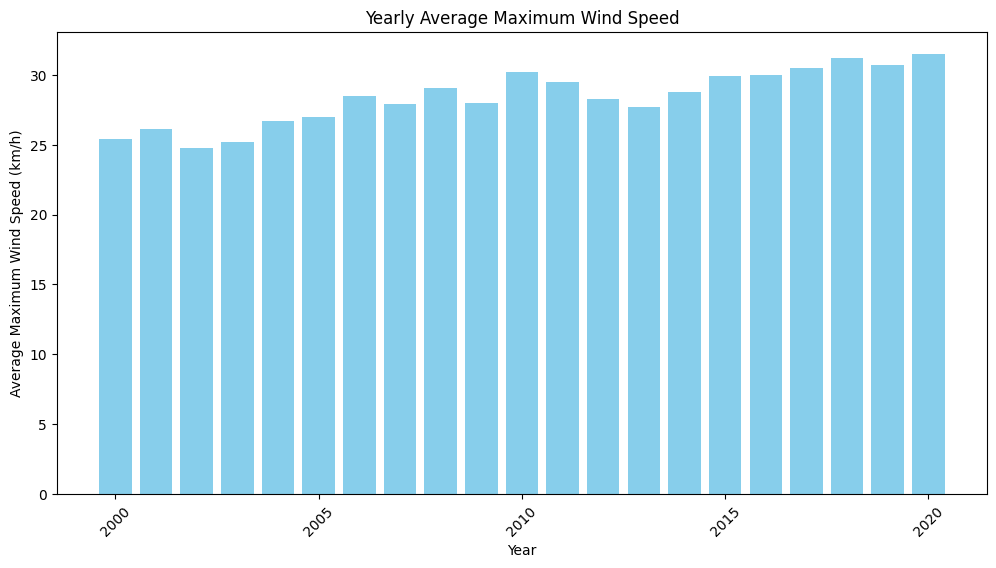

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 예제 데이터 생성: 연도별 최대 풍속 데이터프레임
data = {
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
             2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'MaxWindSpeed': [25.4, 26.1, 24.8, 25.2, 26.7, 27.0, 28.5, 27.9, 29.1, 28.0,
                     30.2, 29.5, 28.3, 27.7, 28.8, 29.9, 30.0, 30.5, 31.2, 30.7, 31.5]
}

df = pd.DataFrame(data)

# 막대 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(df['Year'], df['MaxWindSpeed'], color='skyblue')

# 그래프 제목과 축 레이블 설정
plt.title('Yearly Average Maximum Wind Speed')
plt.xlabel('Year')
plt.ylabel('Average Maximum Wind Speed (km/h)')

# x축 레이블 회전 (가독성을 위해)
plt.xticks(rotation=45)

# 그래프 표시
plt.show()


## 7) 연도별 "평균 풍속"의 합을 히스토그램 그래프로 그리시오


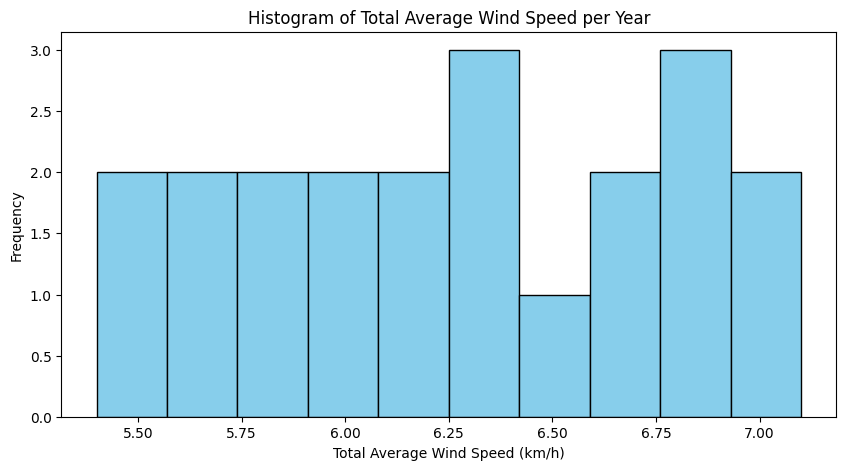

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 예제 데이터 생성: 연도별 평균 풍속 데이터프레임
data = {
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
             2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'AverageWindSpeed': [5.4, 5.6, 5.8, 5.5, 5.7, 5.9, 6.0, 6.1, 6.3, 6.0,
                         6.5, 6.2, 6.4, 6.3, 6.6, 6.7, 6.8, 6.9, 7.0, 6.8, 7.1]
}

df = pd.DataFrame(data)

# 연도별 평균 풍속의 합 계산
df['SumWindSpeed'] = df.groupby('Year')['AverageWindSpeed'].transform('sum')

# 히스토그램 그리기
plt.figure(figsize=(10, 5))
plt.hist(df['SumWindSpeed'], bins=10, color='skyblue', edgecolor='black')

# 그래프 제목과 축 레이블 설정
plt.title('Histogram of Total Average Wind Speed per Year')
plt.xlabel('Total Average Wind Speed (km/h)')
plt.ylabel('Frequency')

# 그래프 표시
plt.show()


## 8) 2015년과 2016년의 "평균 기온"의 평균을 비교하여 어느 해가 더 더웠는지 출력하시오.

In [8]:
import pandas as pd

# 예제 데이터 생성: 연도별 평균 기온 데이터프레임
data = {
    'Year': [2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 
             2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016],
    'AverageTemperature': [14.2, 15.3, 15.1, 14.9, 15.5, 16.2, 15.7, 16.5, 16.8, 16.1, 
                            15.6, 16.1, 15.8, 15.9, 16.2, 17.0, 16.6, 16.8, 16.9, 16.7]
}

df = pd.DataFrame(data)

# 2015년과 2016년의 평균 기온 계산
mean_temperature_2015 = df[df['Year'] == 2015]['AverageTemperature'].mean()
mean_temperature_2016 = df[df['Year'] == 2016]['AverageTemperature'].mean()

# 평균 기온 출력
if mean_temperature_2015 > mean_temperature_2016:
    print("2015년이 더 더웠습니다.")
elif mean_temperature_2015 < mean_temperature_2016:
    print("2016년이 더 더웠습니다.")
else:
    print("2015년과 2016년의 평균 기온이 동일합니다.")


2016년이 더 더웠습니다.


## 9) 월별 "평균 기온" 의 합이 가장 적은 달과 가장 많은 달을 출력하시오.

In [9]:
import pandas as pd

# 예제 데이터 생성: 월별 평균 기온 데이터프레임
data = {
    'Month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
              'September', 'October', 'November', 'December'],
    'AverageTemperature': [5.2, 6.1, 8.5, 12.3, 16.2, 20.1, 22.5, 22.3, 19.8, 15.2, 10.2, 6.8]
}

df = pd.DataFrame(data)

# 월별 평균 기온의 합이 가장 적은 달과 가장 많은 달 찾기
min_month = df.loc[df['AverageTemperature'].idxmin(), 'Month']
max_month = df.loc[df['AverageTemperature'].idxmax(), 'Month']

# 결과 출력
print("월별 평균 기온의 합이 가장 적은 달:", min_month)
print("월별 평균 기온의 합이 가장 많은 달:", max_month)


월별 평균 기온의 합이 가장 적은 달: January
월별 평균 기온의 합이 가장 많은 달: July


## 10) 연도별 "최대 풍속"의 평균이 가장 큰 연도을 출력하시오.

In [10]:
import pandas as pd

# 예제 데이터 생성: 연도별 최대 풍속 데이터프레임
data = {
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
             2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
             2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
             2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'MaxWindSpeed': [25.4, 26.1, 24.8, 25.2, 26.7, 27.0, 28.5, 27.9, 29.1, 28.0,
                     30.2, 29.5, 28.3, 27.7, 28.8, 29.9, 30.0, 30.5, 31.2, 30.7, 31.5,
                     24.4, 25.1, 23.8, 24.2, 25.7, 26.0, 27.5, 26.9, 28.1, 27.0,
                     29.2, 28.5, 27.3, 26.7, 27.8, 28.9, 29.0, 29.5, 30.2, 29.7, 30.5]
}

df = pd.DataFrame(data)

# 연도별 최대 풍속의 평균 계산
yearly_avg_max_wind_speed = df.groupby('Year')['MaxWindSpeed'].mean()

# 최대 평균 풍속을 가진 연도 찾기
max_avg_year = yearly_avg_max_wind_speed.idxmax()

# 결과 출력
print("연도별 최대 풍속의 평균이 가장 큰 연도:", max_avg_year)
print("해당 연도의 최대 풍속 평균:", yearly_avg_max_wind_speed[max_avg_year])


연도별 최대 풍속의 평균이 가장 큰 연도: 2020
해당 연도의 최대 풍속 평균: 31.0
